## 1. Elección del dataset
Hemos elegido como dataset: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers. Que, además de permitirnos aplicar lo aprendido en la asignatura, también nos diese unos resultados con algo de significado. Así, tendríamos la comparación de qué tan bueno es el modelo, pudiendo sacar una conclusión lógica de una predicción "razonable". 
Este dataset se centra principalmente en la predicción, dentro de un banco, de clientes que cancelan sus servicios (tarjetas de crédito en concreto) para así, retenerles con incentivos o ventajas antes de que dejen de contar con dichos servicios. 

La desventaja de este dataset es que cuenta con solo el 16,07% de clientes que anularon sus tarjetas. Sin embargo, aunque para el problema real pueda ser insuficiente, nosotros consideramos que, gracias a la cantidad de datos, nos puede servir bastante bien para entender las relaciones entre distintas variables y, con ello, sacar una predicción buena. Además, nosotros buscaremos predecir el rango de ingresos en función de las demás variables.

In [2]:
# Importación de librerías y lectura del dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

url = "https://raw.githubusercontent.com/pabloruizburgos/AA/refs/heads/main/data/BankChurners.csv"
datos = pd.read_csv(url)
datos

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


## 2 Estudio del dataset
Aquí realizaremos un preprocesado completo de nuestros datos para "prepararlos" para que sirvan para entrenar nuestro modelo. Hay que tener en cuenta que nuestro modelo será de clasificación y, con esto, realizar los cambios pertinentes en nuestro data frame.

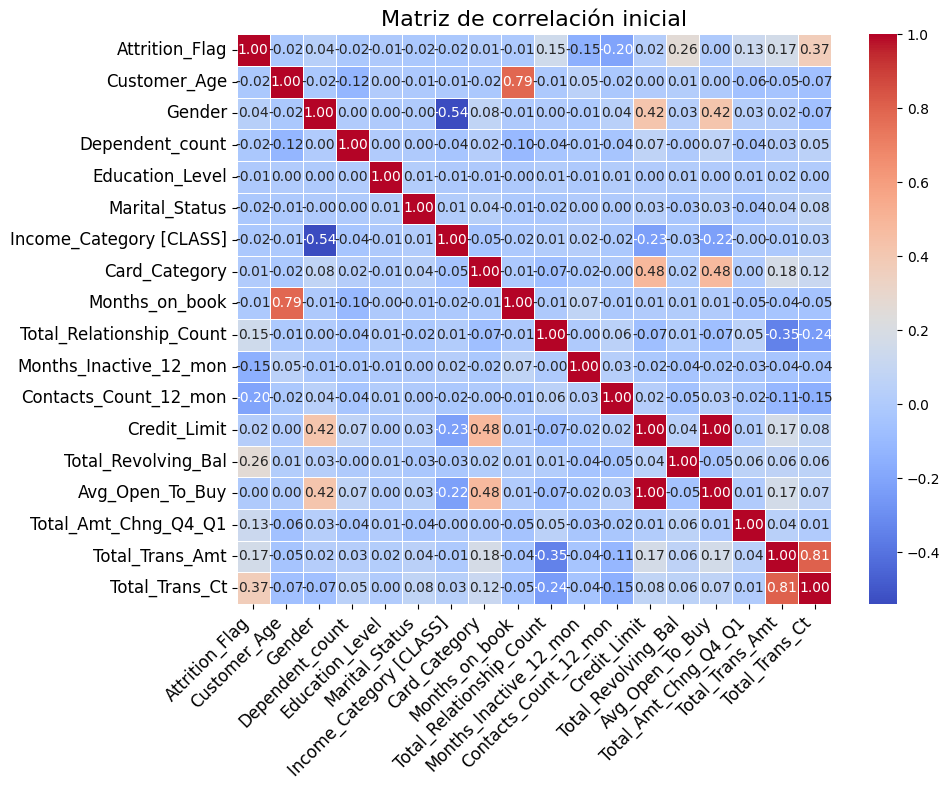

In [3]:
# Como ya sabemos nuestra variable a predecir, le añadimos en su nombre: [CLASE]
datos.rename(columns={'Income_Category': 'Income_Category [CLASS]'}, inplace=True)

# Eliminamos el nº de cliente ya que no ayuda a predecir nada
# Solo serviría de identificador para la fila, pero contamos con el nº de fila ya
datos_limpios = datos.drop(columns = ['CLIENTNUM'])
# Ya que vamos a predecir los ingresos, las predicciones ya existentes no nos sirven
datos_limpios = datos_limpios.drop(datos_limpios.columns[-2:], axis = 1)
# Con 'total transaction amount' y 'total transaction count', no vemos necesario el uso de las que ahora son las dos últimas columnas
# Para relacionar ingresos con gastos asociados a sus tarjetas nos sirve así
datos_limpios = datos_limpios.drop(datos_limpios.columns[-2:], axis = 1) 

# Calculamos la matriz de correlación (one-hot encoding)
#columnas_categoricas = ['Attrition_Flag', 'Education_Level', 'Marital_Status', 'Card_Category', 'Income_Category [CLASE]', 'Gender']
#datos_limpios_dummies = pd.get_dummies(datos_limpios, columns = columnas_categoricas)
#print(datos_limpios_dummies)
#matriz_correlacion = datos_limpios_dummies.corr()

# Identificar columnas categóricas
columnas_categoricas = ['Attrition_Flag', 'Education_Level', 'Marital_Status', 'Card_Category', 'Income_Category [CLASS]', 'Gender']
# Aplicar Label Encoding a las columnas categóricas
label_encoders = {}
for col in columnas_categoricas:
    le = LabelEncoder()
    datos_limpios[col] = le.fit_transform(datos_limpios[col])
    label_encoders[col] = le  # Guardar el encoder si necesitas revertirlo luego

# Calcular la matriz de correlación
matriz_correlacion = datos_limpios.corr()

# Visualización del mapa de calor de correlaciones
plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(
    matriz_correlacion, 
    annot = True,  # Mostrar valores numéricos
    fmt = ".2f",  # Mostramos 2 deccimales
    cmap = "coolwarm",
    linewidths = 0.5,
    annot_kws = {"size": 10} 
)

# Cambiamos labels y estética un poco
plt.title("Matriz de correlación inicial", fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha="right")
plt.yticks(fontsize=12)
plt.tight_layout()  # Ajustar el diseño para evitar solapamiento
plt.show()

Hay que entender que, usando Naive-Bayes, se asume independencia entre las variables, así que, lo que parece una mala matriz de correlación en un principio, nos puede ser muy beneficiosa para el contexto de Naive-Bayes. 

Sabiendo eso, la matriz de correlación también nos sirve para descubir que 'credit_limit' y 'avg_open_to_buy' tienen una correlación perfecta. Esto significa que ya tenemos toda la información que nos aporta una de las variables, solo con la otra. Por ello quitamos 'avg_open_to_buy', que es la que nos parece menos descriptiva de las dos.

Además, eliminaremos: # se van: months_on_book, months_inactive, contacts_count, avg_open_buy (corr=1 con credit_limit), total_trans_cnt (justificar bien), total_amt_chng_Q4..., attrition_flag

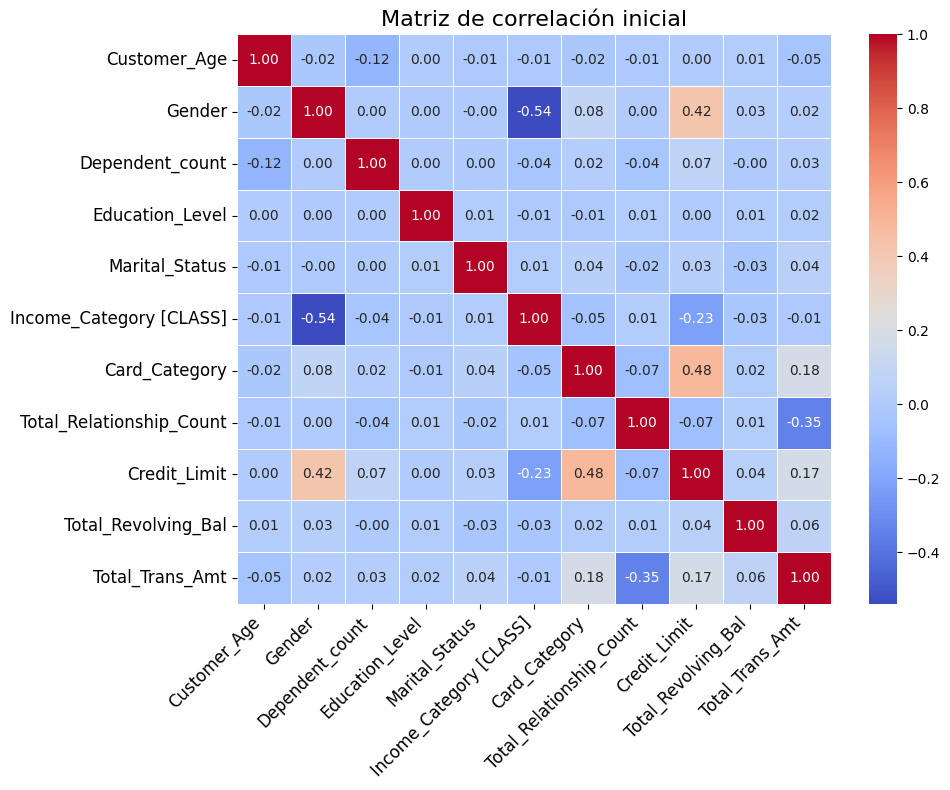

Los rangos de ingresos son:  [2 4 3 1 0 5]
La moda del income es: 4
La moda de genero con unkown income es:  Series([], Name: Gender, dtype: int64)
La moda de estudios con unkown income es:  Series([], Name: Education_Level, dtype: int64)
La moda de Income de mujeres graduate es de:  Series([], Name: Income_Category [CLASS], dtype: int64)
Los nuevos datos unicos son:  [2 4 3 1 0 5]
Los datos unicos de Educacion son:  [3 2 5 6 0 4 1]
La moda de Education_Levele es: 0    2
Name: Education_Level, dtype: int64


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category [CLASS],Card_Category,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt
0,45,1,3,3,1,2,0,5,12691.0,777,1144
1,49,0,5,2,2,4,0,6,8256.0,864,1291
2,51,1,3,2,1,3,0,4,3418.0,0,1887
3,40,0,4,3,3,4,0,3,3313.0,2517,1171
4,40,1,3,5,1,2,0,5,4716.0,0,816
...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,2,2,1,0,3,4003.0,1851,15476
10123,41,1,2,6,0,1,0,4,4277.0,2186,8764
10124,44,0,1,3,1,4,0,5,5409.0,0,10291
10125,30,1,2,2,3,1,0,4,5281.0,0,8395


In [4]:
datos_limpios = datos_limpios.drop(columns = ['Avg_Open_To_Buy'])

datos_limpios = datos_limpios.drop(columns = ['Months_on_book'])

datos_limpios = datos_limpios.drop(columns = ['Months_Inactive_12_mon'])

datos_limpios = datos_limpios.drop(columns = ['Contacts_Count_12_mon'])

datos_limpios = datos_limpios.drop(columns = ['Total_Trans_Ct'])

datos_limpios = datos_limpios.drop(columns = ['Total_Amt_Chng_Q4_Q1'])

datos_limpios = datos_limpios.drop(columns = ['Attrition_Flag'])

#################################################################################
# Identificar columnas categóricas
columnas_categoricas = ['Education_Level', 'Marital_Status', 'Card_Category', 'Income_Category [CLASS]', 'Gender']
# Aplicar Label Encoding a las columnas categóricas
label_encoders = {}
for col in columnas_categoricas:
    le = LabelEncoder()
    datos_limpios[col] = le.fit_transform(datos_limpios[col])
    label_encoders[col] = le  # Guardar el encoder si necesitas revertirlo luego

# Calcular la matriz de correlación
matriz_correlacion = datos_limpios.corr()

# Visualización del mapa de calor de correlaciones
plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(
    matriz_correlacion, 
    annot = True,  # Mostrar valores numéricos
    fmt = ".2f",  # Mostramos 2 deccimales
    cmap = "coolwarm",
    linewidths = 0.5,
    annot_kws = {"size": 10} 
)

# Cambiamos labels y estética un poco
plt.title("Matriz de correlación inicial", fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha="right")
plt.yticks(fontsize=12)
plt.tight_layout()  # Ajustar el diseño para evitar solapamiento
plt.show()
#################################################################################

print('Los rangos de ingresos son: ',datos_limpios['Income_Category [CLASS]'].unique())
# Vemos que hay valores Unkown, por lo que pasamos a reemplazarlos (imputarlos) por la moda de los datos, la calculamos
values, counts = np.unique(datos_limpios['Income_Category [CLASS]'], return_counts=True)
mode = values[np.argmax(counts)]

print(f"La moda del income es: {mode}")
# La moda de Income es 'menos de 40k', vamos a hacer una visualizacion rápida para ver si los datos de 'unkown
# Income' coinciden con los de 'less than 40k', para ello usaremos la moda de su género y la moda de sus 
# estudios, en caso de que concuerden los sustituiremos ('Unkown' -> 'Less than 40k')
moda_unk_gen = datos_limpios[datos_limpios['Income_Category [CLASS]'] == 'Unknown']['Gender'].mode()
moda_unk_est = datos_limpios[datos_limpios['Income_Category [CLASS]'] == 'Unknown']['Education_Level'].mode()

print('La moda de genero con unkown income es: ' ,moda_unk_gen)
print('La moda de estudios con unkown income es: ', moda_unk_est)
# Vemos que la moda, es decir la mayoría de gente en 'unknown', son mujeres y que la mayoria son 'graduate',
# Por lo tanto, susitituimos los valores de 'unknown', por los valores de moda de las mujeres que sean a su vez 'graduate'.
moda_fem_grad = datos_limpios[(datos_limpios['Gender'] == "F") & (datos_limpios['Education_Level'] == 'Graduate')]['Income_Category [CLASS]'].mode()

print('La moda de Income de mujeres graduate es de: ', moda_fem_grad)
# Vemos que la moda de 'Income' de Mujeres 'Graduate' es también de 'Less than 40k' por lo que sustituimos los 
# valores 'unknown' por 'Less than 40k'
datos_limpios['Income_Category [CLASS]'] = datos_limpios['Income_Category [CLASS]'].replace('Unknown', 'Less than $40K')
datos_limpios_adjusted = datos_limpios

# Comprobamos el cambio
print('Los nuevos datos unicos son: ',datos_limpios_adjusted['Income_Category [CLASS]'].unique())

# Ahora hacemos lo mismo con 'Education_Level'
print('Los datos unicos de Educacion son: ', datos_limpios_adjusted['Education_Level'].unique())
print('La moda de Education_Levele es:', datos_limpios_adjusted['Education_Level'].mode())

# Cambiamos 'unknown' por su moda de dato, que es 'Graduate'
datos_limpios_adjusted['Education_Level'] = datos_limpios_adjusted['Education_Level'].replace('Unknown', 'Graduate')

datos_limpios_adjusted

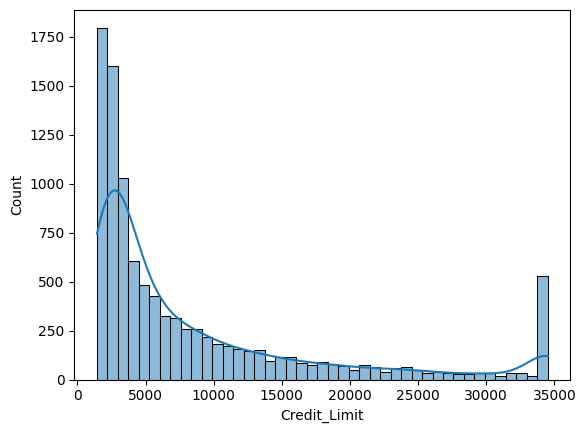

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que tu DataFrame se llama df y la columna de interés es 'columna'

sns.histplot(datos_limpios_adjusted['Credit_Limit'], kde=True)
plt.show()


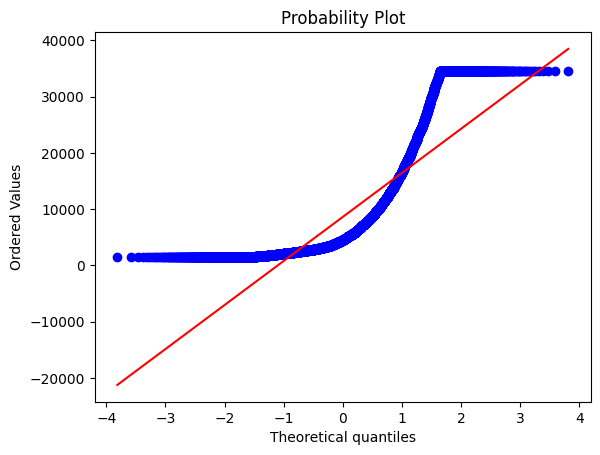

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot para distribución normal
stats.probplot(datos_limpios_adjusted['Credit_Limit'], dist="norm", plot=plt)
plt.show()


In [7]:
from scipy.stats import norm, expon, lognorm, gamma
import numpy as np

# Distribuciones a probar
distributions = [norm, expon, lognorm, gamma]

best_fit = None
best_params = None
best_sse = np.inf  # Mejor ajuste basado en la suma de los errores al cuadrado (SSE)

for dist in distributions:
    # Ajustamos la distribución a los datos
    params = dist.fit(datos_limpios_adjusted['Credit_Limit'])
    
    # Calculamos los valores de la distribución ajustada
    fitted_data = dist.pdf(np.linspace(datos_limpios_adjusted['Credit_Limit'].min(), datos_limpios_adjusted['Credit_Limit'].max(), 100), *params)
    
    # Calculamos la suma de los errores al cuadrado (SSE)
    sse = np.sum((fitted_data - datos_limpios_adjusted['Credit_Limit'].mean())**2)
    
    if sse < best_sse:
        best_sse = sse
        best_fit = dist
        best_params = params

print(f"La mejor distribución ajustada es {best_fit.name} con parámetros {best_params}")


La mejor distribución ajustada es gamma con parámetros (np.float64(0.7110583545565183), np.float64(1438.2999999999997), np.float64(10070.058791708976))


In [12]:
import numpy as np
from scipy.stats import norm, expon, lognorm, gamma

def encontrar_mejor_distribucion(datos, columna, distribuciones):
    """
    Encuentra la mejor distribución que ajusta los datos en una columna específica.

    Parámetros:
    - datos (pd.DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna en el DataFrame a analizar.
    - distribuciones (list): Lista de distribuciones de scipy.stats a probar.

    Retorna:
    - dict: Un diccionario con la mejor distribución, parámetros y SSE.
    """
    # Validar entrada
    if columna not in datos.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")

    if datos[columna].isnull().any():
        raise ValueError(f"La columna '{columna}' contiene valores nulos. Por favor, límpialos antes de continuar.")

    # Inicialización de variables
    best_fit = None
    best_params = None
    best_sse = np.inf

    # Datos a ajustar
    valores = datos[columna]
    x = np.linspace(valores.min(), valores.max(), 100)

    for dist in distribuciones:
        try:
            # Ajustar la distribución a los datos
            params = dist.fit(valores)

            # Generar datos ajustados
            pdf = dist.pdf(x, *params)

            # Calcular SSE
            sse = np.sum((valores.mean() - pdf) ** 2)

            # Actualizar mejor ajuste
            if sse < best_sse:
                best_sse = sse
                best_fit = dist
                best_params = params

        except Exception as e:
            print(f"Error ajustando la distribución {dist.name}: {e}")
            continue

    return {
        "mejor_distribucion": best_fit.name if best_fit else None,
        "parametros": best_params,
        "sse": best_sse
    }

# Ejemplo de uso
import pandas as pd
# Supongamos que tienes un DataFrame con la columna 'Credit_Limit'
# datos_limpios_adjusted = pd.read_csv('tu_archivo.csv')

distribuciones = [norm, expon, lognorm, gamma]
credit_lim_resultado = encontrar_mejor_distribucion(datos_limpios_adjusted, 'Credit_Limit', distribuciones)

print(f"La mejor distribución es: {credit_lim_resultado['mejor_distribucion']}")
print(f"Parámetros: {credit_lim_resultado['parametros']}")
print(f"SSE: {credit_lim_resultado['sse']}")

customer_age_resultado = encontrar_mejor_distribucion(datos_limpios_adjusted,'Customer_Age', distribuciones)

print(f"La mejor distribución es: {customer_age_resultado['mejor_distribucion']}")
print(f"Parámetros: {customer_age_resultado['parametros']}")
print(f"SSE: {customer_age_resultado['sse']}")

dependent_count_resultado = encontrar_mejor_distribucion(datos_limpios_adjusted,'Dependent_count', distribuciones)

print(f"La mejor distribución es: {dependent_count_resultado['mejor_distribucion']}")
print(f"Parámetros: {dependent_count_resultado['parametros']}")
print(f"SSE: {dependent_count_resultado['sse']}")



La mejor distribución es: gamma
Parámetros: (np.float64(0.7110583545565183), np.float64(1438.2999999999997), np.float64(10070.058791708976))
SSE: 7450976063.532405
La mejor distribución es: gamma
Parámetros: (np.float64(4326.397499633611), np.float64(-481.4991848978759), np.float64(0.1219998519253355))
SSE: 214415.39948906982


c:\Users\Tester\Desktop\Carpeta VSCode\Python\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:6626: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\Tester\Desktop\Carpeta VSCode\Python\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


La mejor distribución es: gamma
Parámetros: (np.float64(10054.35877545198), np.float64(-127.92210906569821), np.float64(0.012956414344567672))
SSE: 466.79652303274213


c:\Users\Tester\Desktop\Carpeta VSCode\Python\.venv\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2036: RuntimeWarning: overflow encountered in divide
  place(output, cond, self._pdf(*goodargs) / scale)


In [13]:
def encontrar_mejores_distribuciones(datos, columnas, distribuciones):
    """
    Encuentra la mejor distribución para cada columna especificada en un DataFrame.

    Parámetros:
    - datos (pd.DataFrame): El DataFrame que contiene los datos.
    - columnas (list): Lista de nombres de columnas a analizar.
    - distribuciones (list): Lista de distribuciones de scipy.stats a probar.

    Retorna:
    - dict: Un diccionario con el nombre de cada columna como clave y la información
            de la mejor distribución (nombre, parámetros, SSE) como valor.
    """
    resultados = {}

    for columna in columnas:
        try:
            # Verificar que la columna exista
            if columna not in datos.columns:
                raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")

            # Verificar que la columna no tenga valores nulos
            if datos[columna].isnull().any():
                raise ValueError(f"La columna '{columna}' contiene valores nulos.")

            # Encontrar la mejor distribución para esta columna
            resultado = encontrar_mejor_distribucion(datos, columna, distribuciones)
            resultados[columna] = resultado
        except Exception as e:
            # Capturar errores para columnas problemáticas
            resultados[columna] = {"error": str(e)}
            print(f"Error procesando la columna '{columna}': {e}")

    return resultados

# Ejemplo de uso
columnas_a_analizar = ['Credit_Limit', 'Customer_Age', 'Dependent_count', 'Credit_Limit', 
                       'Total_Revolving_Bal', 'Total_Trans_Amt']
distribuciones = [norm, expon, lognorm, gamma]

# Procesar múltiples columnas
resultados_distribuciones = encontrar_mejores_distribuciones(datos_limpios_adjusted, columnas_a_analizar, distribuciones)

# Mostrar resultados
for columna, info in resultados_distribuciones.items():
    print(f"\nColumna: {columna}")
    if "error" in info:
        print(f"Error: {info['error']}")
    else:
        print(f"Mejor distribución: {info['mejor_distribucion']}")
        print(f"Parámetros: {info['parametros']}")
        print(f"SSE: {info['sse']}")


c:\Users\Tester\Desktop\Carpeta VSCode\Python\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:6626: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\Tester\Desktop\Carpeta VSCode\Python\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Tester\Desktop\Carpeta VSCode\Python\.venv\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2036: RuntimeWarning: overflow encountered in divide
  place(output, cond, self._pdf(*goodargs) / scale)



Columna: Credit_Limit
Mejor distribución: gamma
Parámetros: (np.float64(0.7110583545565183), np.float64(1438.2999999999997), np.float64(10070.058791708976))
SSE: 7450976063.532405

Columna: Customer_Age
Mejor distribución: gamma
Parámetros: (np.float64(4326.397499633611), np.float64(-481.4991848978759), np.float64(0.1219998519253355))
SSE: 214415.39948906982

Columna: Dependent_count
Mejor distribución: gamma
Parámetros: (np.float64(10054.35877545198), np.float64(-127.92210906569821), np.float64(0.012956414344567672))
SSE: 466.79652303274213

Columna: Total_Revolving_Bal
Mejor distribución: expon
Parámetros: (0.0, 1162.8140614199665)
SSE: 135213572.05368498

Columna: Total_Trans_Amt
Mejor distribución: expon
Parámetros: (510.0, 3894.086303939963)
SSE: 1939597568.069331


In [14]:
def probabilidad_condicionada_banco(df: pd.DataFrame, condicionada: str, objetivo: str) -> pd.DataFrame:
    """
    Calcula las probabilidades condicionadas entre dos columnas específicas del dataset banco.

    Args:
    - df (pd.DataFrame): Dataset banco.
    - condicionada (str): Nombre de la columna condicionada (evento dado).
    - objetivo (str): Nombre de la columna objetivo (evento que queremos analizar).

    Returns:
    - pd.DataFrame: DataFrame con las categorías de las dos variables y sus probabilidades condicionadas.
    """
    # Calcular la tabla de frecuencias conjuntas
    tabla_conjunta = pd.crosstab(df[condicionada], df[objetivo])
    
    # Calcular las probabilidades conjuntas dividiendo entre el total de observaciones
    probabilidades_conjuntas = tabla_conjunta / len(df)
    
    # Calcular las probabilidades marginales de la variable condicionada
    marginal_condicionada = probabilidades_conjuntas.sum(axis=1)
    
    # Calcular las probabilidades condicionadas
    probabilidades_condicionadas = probabilidades_conjuntas.div(marginal_condicionada, axis=0)
    
    # Transformar el resultado en un DataFrame largo para mejor presentación
    resultado = probabilidades_condicionadas.reset_index().melt(
        id_vars=condicionada,
        var_name=objetivo,
        value_name=f'P({objetivo} | {condicionada})'
    )
    
    return resultado

In [31]:
def probabilidad_condicionada_banco(df: pd.DataFrame, condicionada: str, objetivo: str) -> pd.DataFrame:
    """
    Calcula las probabilidades condicionadas entre dos columnas específicas del dataset banco.
    
    Args:
    - df (pd.DataFrame): Dataset banco.
    - condicionada (str): Nombre de la columna condicionada (evento dado).
    - objetivo (str): Nombre de la columna objetivo (evento que queremos analizar).
    
    Returns:
    - pd.DataFrame: DataFrame con las categorías de las dos variables y sus probabilidades condicionadas.
    """
    # Calcular la tabla de frecuencias conjuntas
    tabla_conjunta = pd.crosstab(df[condicionada], df[objetivo])
    
    # Calcular las probabilidades conjuntas dividiendo entre el total de observaciones
    probabilidades_conjuntas = tabla_conjunta / len(df)
    
    # Calcular las probabilidades marginales de la variable condicionada
    marginal_condicionada = probabilidades_conjuntas.sum(axis=1)
    
    # Calcular las probabilidades condicionadas
    probabilidades_condicionadas = probabilidades_conjuntas.div(marginal_condicionada, axis=0)
    
    # Transformar el resultado en un DataFrame largo para mejor presentación
    resultado = probabilidades_condicionadas.reset_index().melt(
        id_vars=condicionada,
        var_name=objetivo,
        value_name=f'P({objetivo} | {condicionada})'
    )
    
    return resultado


def clasificar_naive_bayes(df, variables_categoricas, variables_continuas, clases, distribuciones, probabilidades_categoricas, fila_dato):
    """
    Calcula las probabilidades de las clases a predecir usando Naive Bayes con variables mixtas (discretas y continuas).
    
    Args:
    - df (pd.DataFrame): DataFrame con los datos de entrada.
    - variables_categoricas (list): Lista de variables categóricas.
    - variables_continuas (list): Lista de variables continuas.
    - clases (str): Nombre de la columna de la variable objetivo (a predecir).
    - distribuciones (dict): Diccionario con las distribuciones ajustadas y sus parámetros.
    - probabilidades_categoricas (dict): Diccionario con las probabilidades condicionadas de las variables categóricas.
    - fila_dato (pd.Series): Fila con los datos para los cuales queremos calcular la probabilidad de la clase.
    
    Returns:
    - dict: Diccionario con las probabilidades para cada clase.
    """
    probabilidades_clases = {}

    # Obtener el total de observaciones
    total_observaciones = len(df)

    # Iterar sobre cada clase (valor de la variable objetivo)
    for clase in df[clases].unique():
        # Inicializar la probabilidad de la clase
        prob_clase = len(df[df[clases] == clase]) / total_observaciones  # Probabilidad a priori de la clase

        # Probabilidades condicionadas de las variables categóricas
        prob_categoricas = 1
        for var_categ in variables_categoricas:
            # Accedemos a las probabilidades para la variable categórica
            prob_categ_df = probabilidades_categoricas[var_categ]  # DataFrame para la variable categórica

            # Ahora, construimos dinámicamente el nombre de la columna
            col_name = f'P({clases} | {var_categ})'  # Cambiamos el orden para coincidir con el nombre real

            # Filtrar por la clase y la variable categórica
            prob_categ = prob_categ_df[
                (prob_categ_df[clases] == clase) & 
                (prob_categ_df[var_categ] == fila_dato[var_categ])
            ][col_name].values[0]  # Usar el nombre correcto de la columna
            prob_categoricas *= prob_categ

        # Probabilidades de las variables continuas (con las distribuciones ajustadas)
        prob_continuas = 1
        for var_cont in variables_continuas:
            # Obtener los parámetros de la distribución ajustada para esta variable
            distribucion, params = distribuciones.get(var_cont, (None, None))

            if distribucion:
                # Calcular la probabilidad de la variable continua con la PDF
                if distribucion == gamma:
                    prob_continuas *= distribucion.pdf(fila_dato[var_cont], *params)
                elif distribucion == expon:
                    prob_continuas *= distribucion.pdf(fila_dato[var_cont], *params)

        # La probabilidad total para esta clase es el producto de todas las probabilidades
        probabilidad_clase = prob_clase * prob_categoricas * prob_continuas
        probabilidades_clases[clase] = probabilidad_clase

    # Normalizar para obtener probabilidades
    total_probabilidades = sum(probabilidades_clases.values())
    for clase in probabilidades_clases:
        probabilidades_clases[clase] /= total_probabilidades

    return probabilidades_clases





In [32]:
# Variables que se quieren usar
variables_categoricas = ['Gender', 'Education_Level', 'Marital_Status', 'Card_Category']
variables_continuas = ['Credit_Limit', 'Customer_Age', 'Dependent_count', 'Total_Revolving_Bal',
                       'Total_Trans_Amt']

# Crear diccionario de probabilidades condicionadas para cada variable categórica
probabilidades_categoricas = {
    'Gender': probabilidad_condicionada_banco(datos_limpios_adjusted, 'Gender', 'Income_Category [CLASS]'),
    'Education_Level': probabilidad_condicionada_banco(datos_limpios_adjusted, 'Education_Level', 'Income_Category [CLASS]'),
    'Marital_Status': probabilidad_condicionada_banco(datos_limpios_adjusted, 'Marital_Status', 'Income_Category [CLASS]'),
    'Card_Category': probabilidad_condicionada_banco(datos_limpios_adjusted, 'Card_Category', 'Income_Category [CLASS]')
    # Agregar otras variables categóricas según sea necesario
}


# Diccionario con las distribuciones ajustadas
distribuciones = {
    'Credit_Limit': (gamma, (0.711, 0, 1438.30)),
    'Customer_Age': (gamma, (4326.40, -481.50, 0.12)),
    'Dependent_count': (gamma, (10054.36, -127.92, 0.01)),
    'Total_Revolving_Bal': (expon, (0.0, 1162.81)),
    'Total_Trans_Amt': (expon, (510.0, 3894.09))
}

# Fila de datos para predecir
nueva_fila = datos_limpios_adjusted.iloc[0]  # Ejemplo, usando la primera fila del DataFrame

# Predecir la probabilidad de 'Income'
probabilidades_income = clasificar_naive_bayes(datos_limpios_adjusted, variables_categoricas, variables_continuas, 'Income_Category [CLASS]', distribuciones, probabilidades_categoricas, nueva_fila)
print(probabilidades_income)


{np.int64(2): np.float64(0.09039635021829548), np.int64(4): np.float64(0.6527956364099333), np.int64(3): np.float64(0.13246942554437666), np.int64(1): np.float64(0.11998714108593121), np.int64(0): np.float64(0.0031581718871906204), np.int64(5): np.float64(0.0011932748542726693)}


In [33]:
# Find the class with the highest probability
predicted_class = max(probabilidades_income, key=probabilidades_income.get)
print(f"The predicted class is: {predicted_class}")


The predicted class is: 4


In [ ]:
def predecir_multiples_filas(df, variables_categoricas, variables_continuas, clases, distribuciones, probabilidades_categoricas):
    """
    Realiza predicciones para múltiples filas en un DataFrame.
    
    Args:
    - df (pd.DataFrame): DataFrame con los datos de entrada.
    - variables_categoricas (list): Lista de variables categóricas.
    - variables_continuas (list): Lista de variables continuas.
    - clases (str): Nombre de la columna de la variable objetivo (a predecir).
    - distribuciones (dict): Diccionario con las distribuciones ajustadas y sus parámetros.
    - probabilidades_categoricas (dict): Diccionario con las probabilidades condicionadas de las variables categóricas.
    
    Returns:
    - pd.DataFrame: DataFrame con las filas originales y las probabilidades predichas para cada clase.
    """
    predicciones = []  # Lista para almacenar las predicciones de cada fila
    
    for _, fila in df.iterrows():  # Iterar sobre cada fila del DataFrame
        # Obtener las probabilidades para la fila actual
        probabilidades = clasificar_naive_bayes(
            df, variables_categoricas, variables_continuas, clases, distribuciones, probabilidades_categoricas, fila
        )
        # Agregar las probabilidades como una nueva fila
        predicciones.append(probabilidades)
    
    # Convertir las predicciones en un DataFrame
    predicciones_df = pd.DataFrame(predicciones)
    
    # Combinar las filas originales con las predicciones
    resultado = pd.concat([df.reset_index(drop=True), predicciones_df], axis=1)
    
    return resultado


In [ ]:
# Llamar a la función con tus parámetros
resultado_predicciones = predecir_multiples_filas(
    datos_limpios_adjusted,
    variables_categoricas,
    variables_continuas,
    'Income_Category [CLASS]',  # Cambia esto si tu variable objetivo tiene otro nombre
    distribuciones,
    probabilidades_categoricas
)

# Mostrar los resultados
print(resultado_predicciones)


In [ ]:
def predecir_varias_filas_aleatorias(df, variables_categoricas, variables_continuas, clases, distribuciones, probabilidades_categoricas, num_filas=None, random_state=None):
    """
    Predice las probabilidades de la clase para múltiples filas de datos seleccionadas aleatoriamente.

    Args:
    - df (pd.DataFrame): DataFrame con los datos de entrada.
    - variables_categoricas (list): Lista de variables categóricas.
    - variables_continuas (list): Lista de variables continuas.
    - clases (str): Nombre de la columna de la variable objetivo (a predecir).
    - distribuciones (dict): Diccionario con las distribuciones ajustadas y sus parámetros.
    - probabilidades_categoricas (dict): Diccionario con las probabilidades condicionadas de las variables categóricas.
    - num_filas (int, optional): Número de filas para predecir. Si es None, se usan todas las filas.
    - random_state (int, optional): Semilla para aleatorización. Si es None, no se fija la semilla.

    Returns:
    - pd.DataFrame: DataFrame con las probabilidades predichas para cada clase en cada fila.
    """
    # Si no se especifica num_filas, usar todas las filas del DataFrame
    if num_filas is None:
        filas_a_predecir = df
    else:
        filas_a_predecir = df.sample(n=num_filas, random_state=random_state)

    resultados = []
    for index, fila in filas_a_predecir.iterrows():
        # Predecir la probabilidad para una fila
        prob_fila = clasificar_naive_bayes(df, variables_categoricas, variables_continuas, clases, distribuciones, probabilidades_categoricas, fila)
        resultados.append({'fila': index, **prob_fila})

    return pd.DataFrame(resultados)


In [ ]:
# Predecir las probabilidades para 10 filas aleatorias
resultados_aleatorios = predecir_varias_filas_aleatorias(
    df=datos_limpios_adjusted,
    variables_categoricas=variables_categoricas,
    variables_continuas=variables_continuas,
    clases='Income_Category [CLASS]',
    distribuciones=distribuciones,
    probabilidades_categoricas=probabilidades_categoricas,
    num_filas=10,
    random_state=42  # Semilla para reproducibilidad
)

print(resultados_aleatorios)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Definimos las variables para las características y la variable objetivo
X = datos_limpios_adjusted[variables_categoricas + variables_continuas]  # Características (features)
y = datos_limpios_adjusted['Income_Category [CLASS]']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista para almacenar las predicciones
predicciones = []

# Iterar sobre el conjunto de prueba (X_test)
for index, fila in X_test.iterrows():
    # Usamos la función clasificar_naive_bayes para obtener las probabilidades
    prob_fila = clasificar_naive_bayes(datos_limpios_adjusted, variables_categoricas, variables_continuas, 'Income_Category [CLASS]', distribuciones, probabilidades_categoricas, fila)
    
    # Predecir la clase con la mayor probabilidad
    prediccion = max(prob_fila, key=prob_fila.get)  # La clase con la probabilidad más alta
    predicciones.append(prediccion)

# Cálculo de las métricas de evaluación

# Accuracy: porcentaje de predicciones correctas
accuracy = accuracy_score(y_test, predicciones)

# Precision: exactitud de las predicciones positivas
precision = precision_score(y_test, predicciones, average='weighted', zero_division=1)

# Recall: capacidad de detectar todas las instancias positivas
recall = recall_score(y_test, predicciones, average='weighted', zero_division=1)

# F1-Score: media armónica entre precisión y recall
f1 = f1_score(y_test, predicciones, average='weighted', zero_division=1)

# Mostrar los resultados
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
